In [3]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords

import string
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from plotly import tools
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import pickle



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jagad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jagad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jagad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jagad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import io 

In [5]:
import joblib

In [6]:
import spacy

In [7]:
!pip install wordcloud

In [8]:
!pip install plotly

In [9]:
!pip install spacy

In [10]:
df = pd.read_csv("ExtractedTweets.csv")
df.dropna(axis = 0, inplace = True)
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [11]:
df["Party_log"] = [1 if each == "Democrat" else 0 for each in df.Party]
print(df.shape)
df.head()

(86460, 4)


,Party,Handle,Tweet,Party_log
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",1
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,1
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,1
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1


In [12]:
def lemmatize(data_str):
    # expects a string
    list_pos = 0
    cleaned_str = ''
    lmtzr = WordNetLemmatizer() 
    text = data_str.split() 
    tagged_words = pos_tag(text) 
    for word in tagged_words:
        if 'v' in word[1].lower():
            lemma = lmtzr.lemmatize(word[0], pos='v')
        else:
            lemma = lmtzr.lemmatize(word[0], pos='n')
        if list_pos == 0: 
            cleaned_str = lemma
        else:
            cleaned_str = cleaned_str + ' ' + lemma
        list_pos += 1 
    return cleaned_str

In [13]:
def remove_features(data_str): # compile regex
    url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?') 
    punc_re = re.compile('[%s]' % re.escape(string.punctuation)) 
    num_re = re.compile('(\\d+)')
    mention_re = re.compile('@(\w+)')
    alpha_num_re = re.compile("^[a-z0-9_.]+$")
    # convert to lowercase
    data_str = data_str.lower()
    # remove hyperlinks
    data_str = url_re.sub(' ', data_str)
    # remove @mentions
    data_str = mention_re.sub(' ', data_str)
    # remove puncuation
    data_str = punc_re.sub(' ', data_str)
    # remove numeric 'words'
    data_str = num_re.sub(' ', data_str)
    # remove non a-z 0-9 characters and words shorter than 1 characters 
    list_pos = 0
    cleaned_str = ''
    for word in data_str.split():
        if list_pos == 0:
            if alpha_num_re.match(word) and len(word) > 1:
                cleaned_str = word 
            else:
                cleaned_str = ' '
        else:
            if alpha_num_re.match(word) and len(word) > 1:
                cleaned_str = cleaned_str + ' ' + word 
            else:
                cleaned_str += ' '
        list_pos += 1
    
    return " ".join(cleaned_str.split())

In [14]:
# Cleaning Data
data_clean = []
for i in range(len(df.Tweet)):
    res = remove_features(df.Tweet[i])
    res1 = lemmatize(res)
    data_clean.append(res1)

In [15]:
data_clean

['today senate dems vote to savetheinternet proud to support similar netneutrality legislation here in the',
 'rt winter haven resident alta vista teacher be one of several recognize by for national teacher',
 'rt note that hurricane maria have leave approximately billion in damage congress have allocate about',
 'rt meeting with thanks for take the time to meet with ed marucci guzman nalcabpolicy',
 'rt hurricane season start on june st puerto readiness well',
 'rt thank you to all who come out to our orlando gala it be successful night that would not have be possible',
 'hurricane maria leave approx billion in damage yet only billion be allocate for rebuild grid no',
 'rt be delight that will be vote for the cra to overrule the fcc and save our netneutrality rule find',
 'rt trump anti immigrant policy be hurt small business across the country that find american willing to',
 'rt great joining and for roundtable in orlando on federal issue affect central',
 'rt zhihan john art receiv

In [16]:
df['clean_headline'] = data_clean

In [17]:
df

,Party,Handle,Tweet,Party_log,clean_headline
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",1,today senate dems vote to savetheinternet prou...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,1,rt winter haven resident alta vista teacher be...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1,rt note that hurricane maria have leave approx...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,1,rt meeting with thanks for take the time to me...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1,rt hurricane season start on june st puerto re...
...,...,...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,0,check out my op ed on need for end executive o...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...",0,yesterday betty amp have great time learn abou...
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,0,we be forever grateful for the service and sac...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,0,happy first day of school cobbbacktoschool


In [18]:
from wordcloud import STOPWORDS

In [19]:
#add some unnecessary words to STOPWORDS list
STOPWORDS.add("rt")
STOPWORDS.add("s")
STOPWORDS.add("u")
STOPWORDS.add("amp")
STOPWORDS.add("th")
STOPWORDS.add("will")
STOPWORDS.add("t")
STOPWORDS.add("m")

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, test = train_test_split(df, test_size=0.3, train_size=0.7, random_state=14)
train.shape, test.shape

((60521, 5), (25938, 5))

In [22]:
from nltk.stem.lancaster import LancasterStemmer

In [23]:
st = LancasterStemmer()

def token(text):
    txt = nltk.word_tokenize(text.lower())
    return [st.stem(word) for word in txt]

In [24]:
cv = CountVectorizer(tokenizer=token,stop_words=STOPWORDS,
                     analyzer=u'word', min_df=4)
X_train_cv = cv.fit_transform(train['clean_headline'].tolist()) # fit_transform learns the vocab and one-hot encodes
X_test_cv = cv.transform(test['clean_headline'].tolist()) # transform uses the same vocab and one-hot encodes
# print the dimensions of the training set (text messages, terms)
print(X_train_cv.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'abov', 'aft', 'al', 'ar', 'becaus', 'bef', 'ca', 'doe', 'dur', 'els', 'ev', 'furth', 'hav', 'hent', 'howev', 'let', 'lik', 'mor', 'must', "n't", 'ont', 'oth', 'otherw', 'ourselv', 'ov', 'sam', 'sha', 'shal', 'sint', 'som', 'themselv', 'ther', 'theref', 'thes', 'thi', 'thos', 'und', 'wer', 'wher', 'whil', 'wil', 'wo', 'yo', 'yourselv'] not in stop_words.



(60521, 6590)


In [25]:
cv.vocabulary_

{'safeguard': 5051,
 'trad': 5965,
 'secret': 5170,
 'unit': 6143,
 'stat': 5518,
 'liv': 3396,
 'now': 4029,
 'find': 2169,
 'new': 3941,
 'way': 6379,
 'de': 1439,
 'polit': 4465,
 'thi': 5850,
 'issu': 3043,
 'provid': 4611,
 'thos': 5866,
 'posit': 4484,
 'influ': 2940,
 'fin': 2166,
 'result': 4888,
 'high': 2706,
 'school': 5126,
 'stud': 5606,
 'davidson': 1428,
 'dickson': 1589,
 'county': 1310,
 'last': 3276,
 'year': 6550,
 'pledg': 4434,
 'work': 6496,
 'al': 140,
 'extinct': 2043,
 'fac': 2052,
 'ear': 1788,
 'wil': 6443,
 'happy': 2592,
 'birthday': 597,
 'good': 2423,
 'friend': 2294,
 'hour': 2786,
 'marathon': 3532,
 'sess': 5218,
 'arm': 302,
 'serv': 5213,
 'commit': 1153,
 'complet': 1174,
 'fy': 2325,
 'nda': 3902,
 'sec': 5166,
 'numb': 4045,
 'entir': 1921,
 'seg': 5177,
 'congress': 1216,
 'giv': 2391,
 'zero': 6579,
 'input': 2959,
 'cr': 1330,
 'right': 4943,
 've': 6243,
 'hon': 2758,
 'meet': 3624,
 'real': 4732,
 'lif': 3365,
 'hero': 2691,
 'spent': 5460,
 

In [26]:
tv=TfidfVectorizer(stop_words=STOPWORDS,analyzer=u'word',min_df=4)

In [27]:
X_train_cv = tv.fit_transform(train['clean_headline'].tolist()) # fit_transform learns the vocab and one-hot encodes
X_test_cv = tv.transform(test['clean_headline'].tolist())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



In [28]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report

In [29]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X = X_train_cv, y = train['Party_log'])

y_pred_rfc=rfc.predict(X_test_cv)
accuracy_score(y_pred_rfc, test['Party_log'])

0.7240727889582852

Accuracy: 0.724
Precision: 0.737
Recall: 0.671
F1 Score: 0.702


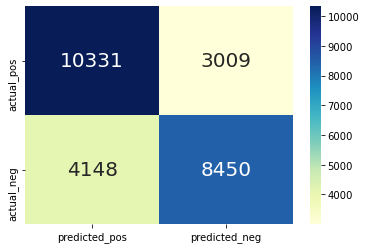

In [30]:
cm = confusion_matrix(test['Party_log'], y_pred_rfc)
sns.heatmap(cm, xticklabels=['predicted_pos', 'predicted_neg'], yticklabels=['actual_pos', 'actual_neg'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [31]:
lr = LogisticRegression()
lr.fit(X = X_train_cv, y = train['Party_log'])

y_pred_lr=lr.predict(X_test_cv)
accuracy_score(y_pred_lr, test['Party_log'])

0.7469735523170637

In [32]:
mnb = MultinomialNB(alpha = 0.1, fit_prior = True)
mnb.fit(X_train_cv.toarray(), train['Party_log'])

y_pred_mnb = mnb.predict(X_test_cv.toarray())
accuracy_score(y_pred_mnb, test['Party_log'])

0.7449302182126609

In [33]:
import joblib

In [34]:
rdf=open("rfc.pkl","wb")

In [35]:
joblib.dump(rfc,rdf)

In [36]:
logreg=open("lr.pkl","wb")
joblib.dump(lr,logreg)

In [37]:
tfidf=open("tv.pkl","wb")
joblib.dump(tv,tfidf)

In [38]:
import gzip, pickle, pickletools
filepath = "C:/Users/Jagad/Data Mining Project/models/lr.pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(lr)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [39]:
 vec_text=cv.transform(Text).toarray()

NameError: name 'Text' is not defined

In [ ]:
 result=rfc.predict(vec_text)

In [ ]:
  print(result)